This uses ChemCam cleaned, calibrated spectra from the PDS repository. The data is given in csv format with the first column being the wavelength and the following columns representing the intensities measured in units of photons per channels for each of the $n$ shots.

In [1]:
import pandas as pd
from pathlib import Path

def get_first_sample(data_dict: dict[str, list[pd.DataFrame]]):
    v = list(data_dict.keys())[0]
    return (v, data_dict[v])

In [4]:
from PLS_SM.data import load_data

sample_data = load_data("data/data/calib/calib_2015/1600mm/pls/", 10)

In [3]:
get_first_sample(sample_data)[1][0].head()

,wave,shot_avg
0,240.81100,6.185048e+15
1,240.86501,2.362390e+12
2,240.91800,2.487841e+11
3,240.97200,7.561940e+11
4,241.02699,1.387382e+12


In [4]:
# Remove values in the following masks
# The following wavelength ranges are known to have noise: they do not include major element diagnostic peaks.
from reproduction import masks

def mask_wavelegths(data: pd.DataFrame, mask):
    return data.loc[~((data["wave"] >= mask[0]) & (data["wave"] <= mask[1]))]

for _sample_name, sample_dfs in sample_data.items():
    for i, _ in enumerate(sample_dfs):
        for mask in masks:
            sample_data[_sample_name][i] = mask_wavelegths(sample_data[_sample_name][i], mask)

get_first_sample(sample_data)[1][0].head()

,wave,shot_avg
110,246.68800,3.998589e+11
111,246.74100,3.623102e+11
112,246.79401,3.125834e+11
113,246.84700,2.548143e+11
114,246.89999,2.384109e+11


> The spectra from the first five shots are discarded to minimize any surface contamination, and the subsequent 45 shots from each location are averaged together to give 5 spectra per sample (2040 spectra total).

The reason there are 5 *.csv files for each sample is that they shot at 5 different locations for each sample.
The first 5 shots are discarded to minimize any surface contamination, and the subsequent 45 shots from each location are averaged together to give 5 spectra per sample (2040 spectra total).

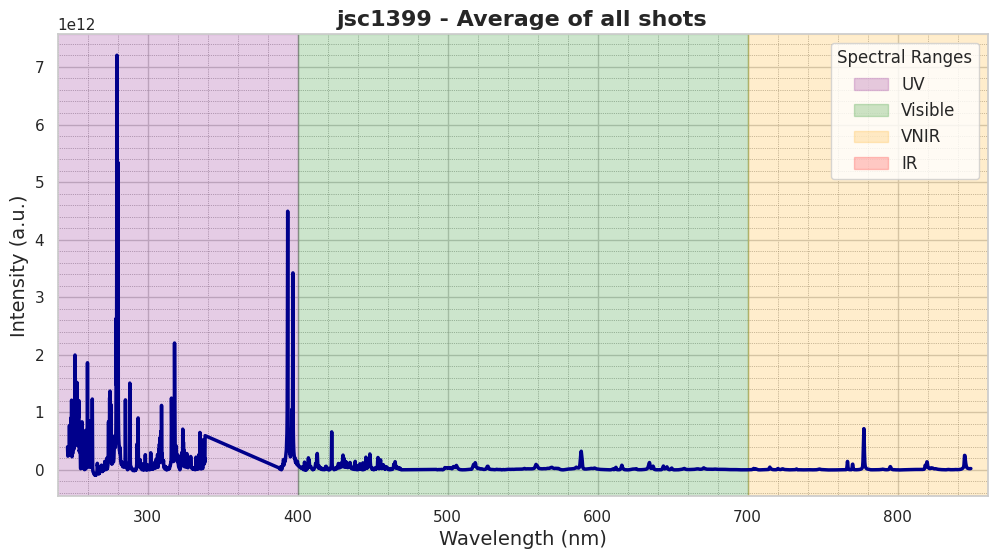

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sample(sample_name, sample):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    sns.lineplot(x=sample["wave"], y=sample["shot_avg"], linewidth=2.5, linestyle='-', color='darkblue')

    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

    ranges = {
        'UV': (100, 400, 'purple'),
        'Visible': (400, 700, 'green'),
        'VNIR': (700, 1100, 'orange'),
        'IR': (1100, 2500, 'red')
    }

    for label, (start, end, color) in ranges.items():
        plt.axvspan(start, end, alpha=0.2, label=label, color=color)

    plt.title(f"{sample_name} - Average of all shots", fontsize=16, fontweight='bold')
    plt.xlabel("Wavelength (nm)", fontsize=14)
    plt.ylabel("Intensity (a.u.)", fontsize=14) # a.u. = arbitrary units
    plt.legend(title='Spectral Ranges', loc='upper right', fontsize=12)
    plt.xlim(240, 860)
    plt.show()

name, samples = get_first_sample(sample_data)
plot_sample(name, samples[0])

In [6]:
labels = pd.read_csv("data/data/calib/ccam_calibration_compositions.csv")

labels.head()

,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration
0,AGV2,AGV2,AGV2,59.3,1.05,16.91,6.02,0.099,1.79,5.20,4.19,2.88,97.44,1.0,1.0,1.0
1,BCR-2,BCR2,BCR2,54.1,2.26,13.50,12.42,0.200,3.59,7.12,3.16,1.79,98.14,1.0,1.0,1.0
2,BEN,BEN,BEN,38.2,2.61,10.07,11.61,0.200,13.15,13.87,3.18,1.39,94.28,1.0,1.0,1.0
3,BHVO2,BHVO2,BHVO2,49.9,2.73,13.50,11.07,0.167,7.23,11.40,2.22,0.52,98.74,1.0,1.0,1.0
4,BIR-1a,BIR1,BIR1,47.7,0.97,15.40,10.19,0.176,9.7,13.40,1.81,0.03,99.38,1.0,1.0,1.0


In [7]:
ica = Path("data/data/calib/calib_2015/1600mm/ica/")
pls = Path("data/data/calib/calib_2015/1600mm/pls/")

def get_samples(path):
    return set(map(lambda p: p.name, list(path.glob("*"))))

ica_samples = get_samples(ica)
pls_samples = get_samples(pls)

# samples that are in both pls and ica
print(set(ica_samples) & set(pls_samples))

# samples that are in pls but not in ica
print(set(pls_samples) - set(ica_samples))

# samples that are in ica but not in pls
print(set(ica_samples) - set(pls_samples))

{'jsc1452', 'ja1', 'gbw07114', 'jsc1445', 'jsc1378', 'pl5', 'mix3o', 'jsc1377', 'jsc1366', 'p6mt', 'jsc1439', 'm3mt', 'nau2', 'vh49', 'g15mt', 'jsc1394', 'unszk', 'jsc1407', 'jsc1410', 'p2mt', 'jsc1435', 'pw6', 'hvalfj011', 'jsc1380', 'dkm1790', 'mix2o', 'ncsdc47009', 'wc3', 'gbw07309', 'guwgna', 'lp28', 'sc1', 'p12mt', 'jsc1465', 'dkm2990', '3tio2', 'sarm16', 'jsc1381', 'p8mt', '117a', 'sanck', 'ultramafic', 'pl6', 'jsc1424', 'jsc1419', 'ben', 'mi5', 's4', 'jsc1468', 'sancj', 'g19mt', '201427', 'ao6', 'dkm3290', 'jsc1411', 'jsc1443', 'jsc1428', 'sc2', 'ao10', 'jsc1450', 'jsc1388', 'lp14', 'mix5d', 'm8mt', 'pl4', '54940m', 'r24', 'sc6', 'mhc3828', 'jsc1379', 'gbw07312', 'jsc1462', 'mhc2319', 'dkm1890', 'jsc1393', 'sc8', 'pl7', 'gl6mt', 'jsc1420', 'pw5', 'jsc1389', 'srm98a', 'jsc1369', 'swy1', 'jsc1432', 'wc1', 'gl5mt', 'jsc1460', 'bhvo2', 'g1mt', 'cl5', 'sancb', 'jsc1451', 'jsc1370', 'mo13', 'jsc1458', '54949m', 'lp20', 'jsc1453', 'ncsdc47008', 'jb3', '221137', 'icel009010', 'g12mt', '

In [8]:
def get_composition_for_sample(sample_name, labels):
    """
    Find samples in the labels dataset. 
    This looks for samples by their spectrum name, as is done in the pls and ica folders on PDS in calib_2015.
    """
    return labels.loc[labels["Spectrum Name"].str.lower() == sample_name.lower()]

- Train full model to get predictions for all samples for all oxides
- Train 3 sub-models for each oxide

In [9]:
sample_compositions: dict[str, pd.DataFrame] = {}

for _sample_name in sample_data.keys():
    comp = get_composition_for_sample(_sample_name, labels)
    if comp.empty: 
        print(f"Could not find {_sample_name} in labels")
        continue
    sample_compositions[_sample_name] = comp

list(sample_compositions.values())[0]

Could not find 201424 in labels


,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration
142,1399,JSC1399,PSNJ1,51.03,1,13.83,9.93,0.175,6.33,10.7,2.01,0.6,95.6,1.0,1.0,0.0


In [10]:
major_oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O']

def get_major_oxides(sample_composition) -> pd.Series:
    # make pd.series from columns in dataframe
    return sample_composition[major_oxides].iloc[0]

In [11]:
# This also works for transforming the data - and is probably more efficient
# aggregated_spectral_data = sample_data["g14mt"][0].groupby('wave')['shot_avg'].mean().reset_index()
# transformed_aggregated_spectral_data = aggregated_spectral_data.transpose()
# transformed_aggregated_spectral_data.columns = transformed_aggregated_spectral_data.iloc[0]
# transformed_aggregated_spectral_data = transformed_aggregated_spectral_data.drop('wave').reset_index(drop=True)

def transform_dataframe(df, sample_size):
    """
    Transforms the DataFrame into a format where each row represents a sample
    and each column represents a wavelength.
    """
    # Reshape the 'shot_avg' values to have 'sample_size' rows
    reshaped_values = df['shot_avg'].values.reshape(sample_size, -1)
    
    # Create a new DataFrame with the reshaped values
    # Use unique 'wave' values as column names
    transformed_df = pd.DataFrame(reshaped_values, columns=df['wave'].unique())
    
    return transformed_df

sample_size = 1

In [12]:
# transform all samples
# final_df = pd.concat([transform_dataframe(dfs[0], sample_size) for dfs in sample_data.values()], ignore_index=True)

# iterate over all samples
# get the first dataframe for each sample
# transform the dataframe
# add the label to the dataframe
# skip if the oxides labels cannot be found
dfs = []
for sample_name, sample_dfs in sample_data.items():
    df = transform_dataframe(sample_dfs[0], sample_size)
    if sample_name not in sample_compositions:
        continue
    oxides = get_major_oxides(sample_compositions[sample_name])
    
    # add the label to the dataframe
    df = df.assign(**oxides)
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)
final_df
    

,246.688,246.741,246.79401,246.847,246.89999,246.953,247.007,247.06,247.11301,247.166,...,848.89642,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O
0,3.998589e+11,3.623102e+11,3.125834e+11,2.548143e+11,2.384109e+11,2.535727e+11,2.867055e+11,3.181519e+11,3.228308e+11,3.108220e+11,...,2.293541e+10,51.03,1,13.830000,9.930000,0.175000,6.33,10.700000,2.01,0.6
1,7.224237e+11,6.645602e+11,5.624923e+11,4.217554e+11,4.086364e+11,4.559630e+11,5.132172e+11,5.743058e+11,5.769901e+11,5.580480e+11,...,1.792730e+09,52.18985755,2.969163409,16.328663,13.221575,0.194498,5.766648112,11.709642,2.895858639,0.60510479
2,2.946508e+11,2.878567e+11,2.714233e+11,2.477861e+11,2.295162e+11,2.221419e+11,2.261767e+11,2.363920e+11,2.417034e+11,2.396820e+11,...,2.160406e+08,35.85,0,0.370000,5.880000,0.091000,56.14,0.480000,0.02,0.01
3,5.412693e+11,5.007069e+11,4.436453e+11,3.717135e+11,3.403081e+11,3.536884e+11,3.879550e+11,4.262757e+11,4.425391e+11,4.369307e+11,...,2.860793e+08,60.4,0.95,19.600000,8.880000,0.144000,2.15,0.160000,0.84,4.43
4,4.940309e+11,4.494328e+11,3.827236e+11,3.013089e+11,2.904978e+11,3.141921e+11,3.542201e+11,3.909324e+11,3.987757e+11,3.890887e+11,...,1.630372e+10,54.1,2.26,13.500000,12.420000,0.200000,3.59,7.120000,3.16,1.79
5,3.549576e+11,3.120665e+11,2.539465e+11,1.861322e+11,1.830561e+11,2.016834e+11,2.369601e+11,2.741842e+11,2.714772e+11,2.616474e+11,...,1.034805e+09,69.08,0.49,0.570000,6.650000,0.010000,0.02,0.420000,2.72,0.73
6,4.134499e+11,3.783298e+11,3.313482e+11,2.841791e+11,2.679925e+11,2.824940e+11,3.123271e+11,3.410883e+11,3.525166e+11,3.484774e+11,...,6.070156e+10,64.05,0.72,15.950000,6.680000,0.100000,2.05,0.820000,2.6,3.25
7,2.697247e+11,2.386756e+11,1.967238e+11,1.511679e+11,1.366985e+11,1.497464e+11,1.766257e+11,2.020294e+11,2.075997e+11,1.992031e+11,...,8.656359e+08,54.56,1.16,17.430000,6.310000,0.098000,4.41,7.220000,3.86,1.85
8,3.681177e+11,3.439153e+11,3.140416e+11,2.832219e+11,2.677954e+11,2.729105e+11,2.923813e+11,3.136701e+11,3.235786e+11,3.215151e+11,...,4.983803e+10,61.4,0.78,16.120000,7.710000,0.050000,3.38,1.640000,4.94,1.37


In [13]:
final_df.shape

(9, 5494)

In [14]:
from numpy import sqrt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

name, datasets = get_first_sample(sample_data)
composition_row_data = get_composition_for_sample(name, labels)
composition = get_major_oxides(composition_row_data)

for oxide in major_oxides:
    X = final_df.drop(major_oxides, axis=1)
    y = final_df[oxide]

    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    pls = PLSRegression(n_components=2)
    pls.fit(X_train, y_train)

    # Make predictions
    y_pred_train = pls.predict(X_train)
    y_pred_test = pls.predict(X_test)

    # Evaluate the model
    mse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"Train RMSE: {mse_train}, Test RMSE: {mse_test}")
    break

Train RMSE: 1.658278707331448, Test RMSE: 1.457018741641453
